Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

Attribute information
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Define column names based on the dataset description
column_names = [
    "ID", "Diagnosis",
    "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
    "Compactness Mean", "Concavity Mean", "Concave Points Mean", "Symmetry Mean", "Fractal Dimension Mean",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE",
    "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE",
    "Radius Worst", "Texture Worst", "Perimeter Worst", "Area Worst", "Smoothness Worst",
    "Compactness Worst", "Concavity Worst", "Concave Points Worst", "Symmetry Worst", "Fractal Dimension Worst"
]

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=column_names)

In [17]:
df.head()

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.describe()

,ID,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.isnull().sum().sort_values(ascending=False)

ID                         0
Diagnosis                  0
Symmetry Worst             0
Concave Points Worst       0
Concavity Worst            0
Compactness Worst          0
Smoothness Worst           0
Area Worst                 0
Perimeter Worst            0
Texture Worst              0
Radius Worst               0
Fractal Dimension SE       0
Symmetry SE                0
Concave Points SE          0
Concavity SE               0
Compactness SE             0
Smoothness SE              0
Area SE                    0
Perimeter SE               0
Texture SE                 0
Radius SE                  0
Fractal Dimension Mean     0
Symmetry Mean              0
Concave Points Mean        0
Concavity Mean             0
Compactness Mean           0
Smoothness Mean            0
Area Mean                  0
Perimeter Mean             0
Texture Mean               0
Radius Mean                0
Fractal Dimension Worst    0
dtype: int64

In [20]:
df['Diagnosis'].value_counts() 

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [21]:
#################   DONT RUN THIS CODE AGAIN  #################

# Convert 'M' to 1 and 'B' to 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Verify the transformation
print(df['Diagnosis'].unique())  # Should print: [0, 1]
print(df['Diagnosis'].value_counts()) # Should print: [357, 212]

[1 0]
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
df.head() # check if the transformation was successful

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.preprocessing import minmax_scale
X_train_scaled = minmax_scale(X_train)
X_test_scaled = minmax_scale(X_test)

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    """
    Evaluates a classification model by:
    - Training on `X_train`
    - Predicting on `X_test`
    - Computing classification metrics
    - Performing cross-validation (if cv > 1)
    - Plotting the learning curve

    Parameters:
    model  - Trained ML model (e.g., KNN, Logistic Regression)
    X_train, y_train - Training dataset
    X_test, y_test - Test dataset
    cv - Number of folds for cross-validation (if 0, skip cross-validation)
    """
    
    # --- 🚀 Train Model Normally ---
    model.fit(X_train, y_train)  

    # --- 📌 Predict on Test Set ---
    y_pred = model.predict(X_test)

    # --- 📌 Check if Model Supports Probability Predictions ---
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use probability for ROC AUC
    else:
        y_pred_proba = None  # Prevents errors

    # --- 📌 Compute Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # --- 📌 Print Classification Report ---
    print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

    # --- 📌 Perform Cross-Validation (Only If `cv > 1`) ---
    if cv > 1:
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

        print("\n📌 Cross-validation Results:")
        print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.2f}")
        print(f"Precision: {np.mean(cv_results['test_precision']):.2f}")
        print(f"Recall: {np.mean(cv_results['test_recall']):.2f}")
        print(f"F1 Score: {np.mean(cv_results['test_f1']):.2f}")
        print(f"ROC AUC: {np.mean(cv_results['test_roc_auc']):.2f}")

    else:
        print("\n🚀 Skipping Cross-Validation (`cv=0`)...")
    
    # --- 📌 Print Individual Metrics ---
    print("\n📌 Test Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc}")  # ✅ Now ROC AUC will be "N/A" if not supported

    # --- 🚀 Learning Curve Analysis ---
    if cv > 1:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='accuracy'
        )

        # Compute mean and standard deviation
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Plot learning curve
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

        plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s', linestyle='--')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy")
        plt.title(f"Learning Curve: {model.__class__.__name__}")
        plt.legend()
        plt.grid()
        plt.show()


In [124]:
################ KNN Model Basic ################
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, 0)


📌 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


🚀 Skipping Cross-Validation (`cv=0`)...

📌 Test Set Evaluation:
Accuracy: 0.96
Precision: 0.93
Recall: 0.95
F1 Score: 0.94
ROC AUC: 0.9936128398296757


In [65]:
################ KNN Model Without Scaled Data ################

knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train, y_train, X_test, y_test,0)

################# UNDERFITTING ################


📌 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.74      0.53      0.62        43

    accuracy                           0.75       114
   macro avg       0.75      0.71      0.72       114
weighted avg       0.75      0.75      0.74       114


🚀 Skipping Cross-Validation (`cv=0`)...

📌 Test Set Evaluation:
Accuracy: 0.75
Precision: 0.74
Recall: 0.53
F1 Score: 0.62
ROC AUC: 0.8101867016049786


✅ Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


📌 Cross-validation Results:
Accuracy: 0.96
Precision: 0.99
Recall: 0.91
F1 Score: 0.95
ROC AUC: 0.99

📌 Test Set Evaluation:
Accuracy: 0.96
Precision: 0.93
Recall: 0.98
F1 Score: 0.95
ROC AUC: 0.9983622666229938


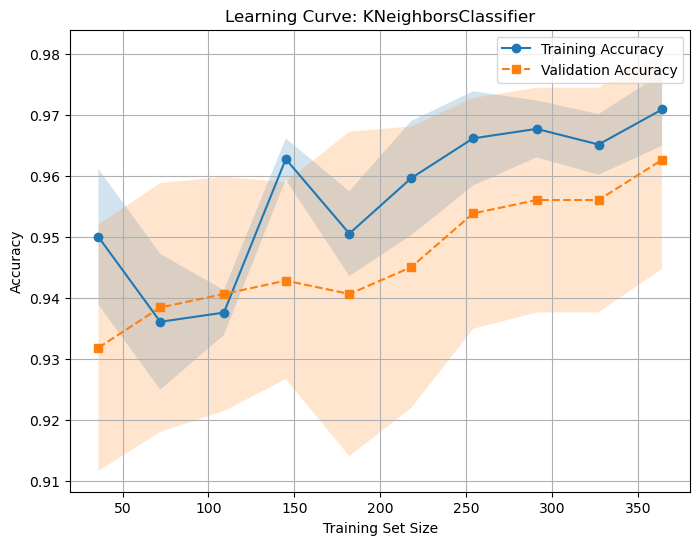

In [ ]:
################ OPTIMAL KNN Model With Grid Search ################
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for k
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'weights': ['uniform', 'distance']  # Weight function
}

# Initialize Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("✅ Best Hyperparameters:", best_params)

knn_model = KNeighborsClassifier(**best_params)
evaluate_model(knn_model, X_train_scaled, y_train, X_test_scaled, y_test, cv = 5)

In [88]:
#################### LOGISTIC REGRESSION MODEL BASIC  ####################
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
evaluate_model(logistic_model, X_train_scaled, y_train, X_test_scaled, y_test, cv = 0)


📌 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.98      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


🚀 Skipping Cross-Validation (`cv=0`)...

📌 Test Set Evaluation:
Accuracy: 0.95
Precision: 0.89
Recall: 0.98
F1 Score: 0.93
ROC AUC: 0.9983622666229938


✅ Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        71
           1       0.90      1.00      0.95        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


📌 Cross-validation Results:
Accuracy: 0.97
Precision: 0.98
Recall: 0.93
F1 Score: 0.95
ROC AUC: 0.99

📌 Test Set Evaluation:
Accuracy: 0.96
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
ROC AUC: 0.99737962659679


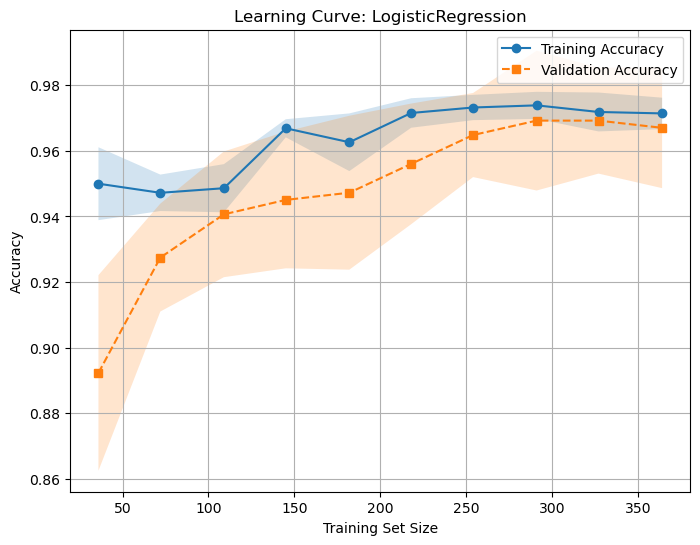

In [111]:
##################### OPTIMAL LOGISTIC REGRESSION MODEL WITH GRID SEARCH  ####################
param_grid = {
    'C': [0.01, 0.1, 1],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers compatible with L1 and L2
}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression( max_iter=500), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("✅ Best Hyperparameters:", best_params)

# Initialize Logistic Regression with best parameters
log_reg_model = LogisticRegression(**best_params)

# Evaluate the optimized model
evaluate_model(log_reg_model, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)

In [112]:
##################### DECISION TREE MODEL BASIC WITH NORMALIZED DATA ####################
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train_scaled, y_train, X_test_scaled, y_test, cv = 0)


📌 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.82        71
           1       0.75      0.49      0.59        43

    accuracy                           0.75       114
   macro avg       0.75      0.69      0.70       114
weighted avg       0.75      0.75      0.73       114


🚀 Skipping Cross-Validation (`cv=0`)...

📌 Test Set Evaluation:
Accuracy: 0.75
Precision: 0.75
Recall: 0.49
F1 Score: 0.59
ROC AUC: 0.6948902718637405


In [116]:
###################### DECISION TREE MODEL BASIC  ####################
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, cv = 0)


📌 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


🚀 Skipping Cross-Validation (`cv=0`)...

📌 Test Set Evaluation:
Accuracy: 0.94
Precision: 0.93
Recall: 0.91
F1 Score: 0.92
ROC AUC: 0.9323616115296429


✅ Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.88      0.98      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114


📌 Cross-validation Results:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
ROC AUC: 0.95

📌 Test Set Evaluation:
Accuracy: 0.94
Precision: 0.88
Recall: 0.98
F1 Score: 0.92
ROC AUC: 0.945791025221094


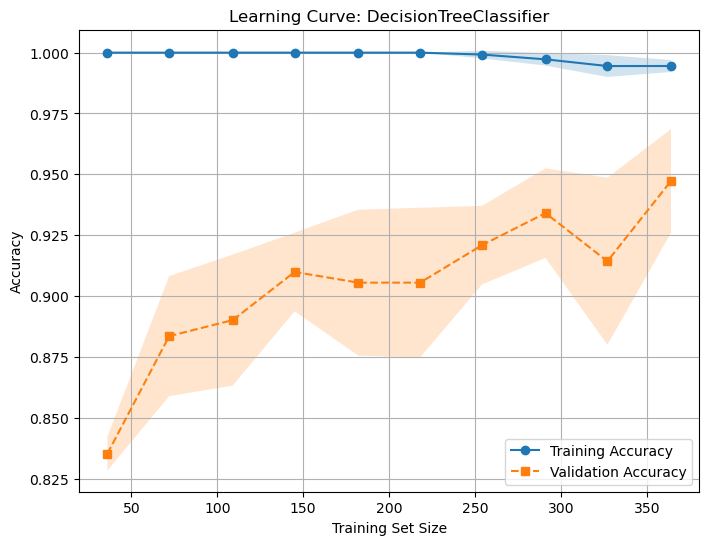

In [117]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting strategy
    'max_depth': [3, 5, 10, None],  # Maximum depth of tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples required in a leaf node
}

# Initialize Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("✅ Best Hyperparameters:", best_params)

# Initialize Decision Tree with best parameters
tree_model = DecisionTreeClassifier(**best_params, random_state=42)

# Evaluate the optimized model
evaluate_model(tree_model, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)